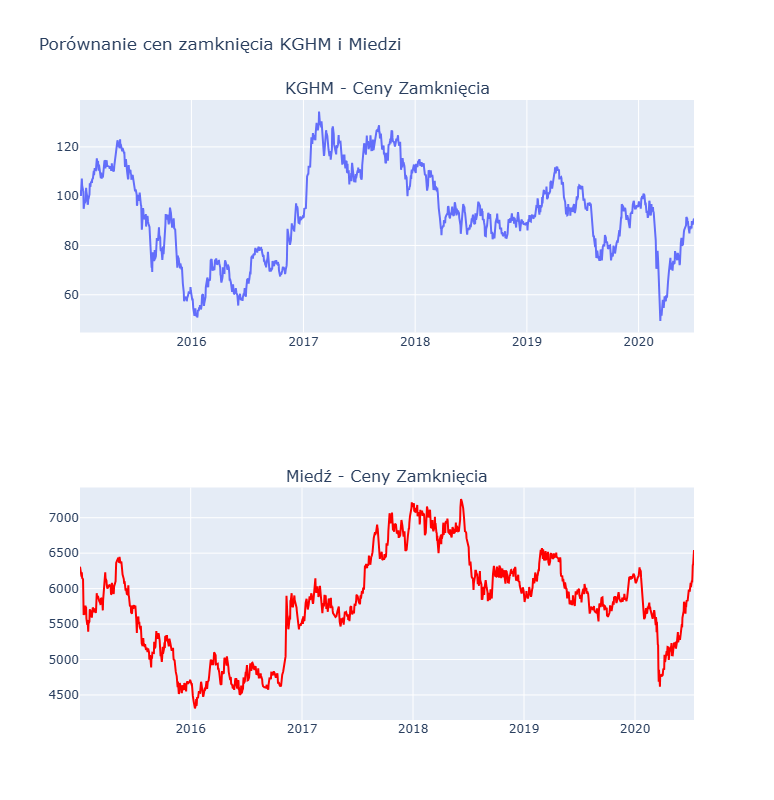

In [15]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

kgh_data = pd.read_csv('kgh_d.csv')
copper_data = pd.read_csv('ca_c_f_d.csv')

kgh_data['Data'] = pd.to_datetime(kgh_data['Data'])
copper_data['Data'] = pd.to_datetime(copper_data['Data'])

fig = make_subplots(rows=2, cols=1, subplot_titles=("KGHM - Ceny Zamknięcia", "Miedź - Ceny Zamknięcia"))

fig.add_trace(
    go.Scatter(
        x=kgh_data['Data'],
        y=kgh_data['Zamkniecie'],
        mode='lines',
        name='KGHM - Ceny Zamknięcia'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=copper_data['Data'],
        y=copper_data['Zamkniecie'],
        mode='lines',
        name='Miedź - Ceny Zamknięcia',
        line=dict(color='red')  # Kolor linii
    ),
    row=2, col=1
)

fig.update_layout(
    height=800, 
    width=1000, 
    title_text="Porównanie cen zamknięcia KGHM i Miedzi",
    showlegend=False  
)

fig.show()

Dodaje tabele jako trzeci element w układzie subplotów przy uzyciu go.Table, funkcji make_subplotts.

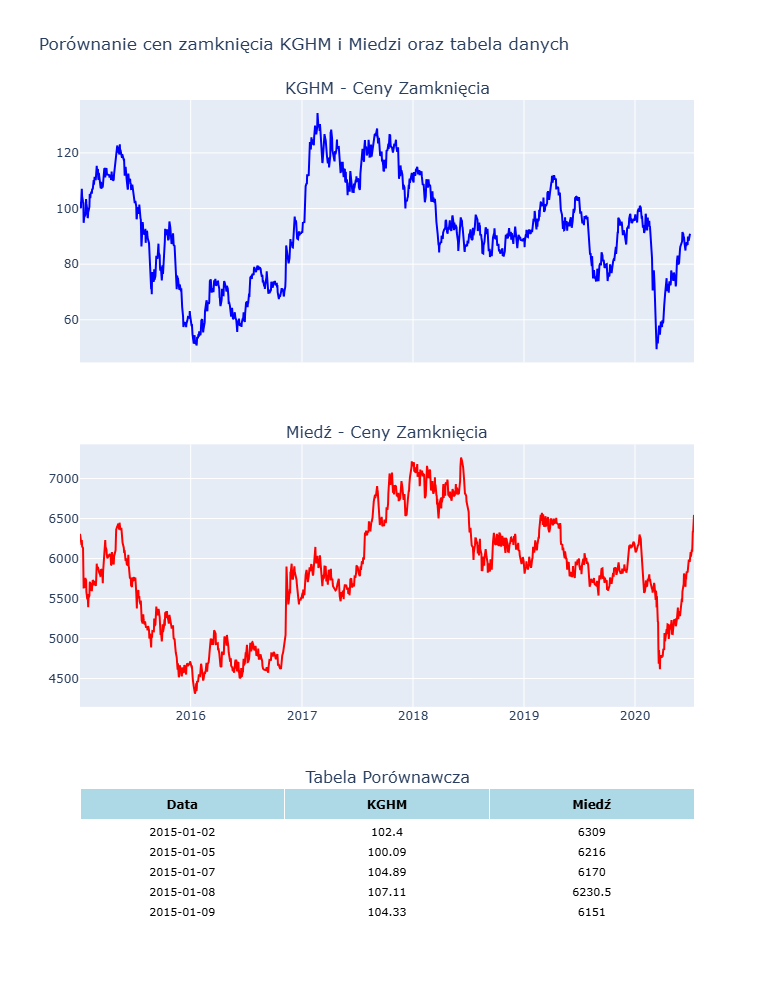

In [23]:
merged_data = pd.merge(
    kgh_data[['Data', 'Zamkniecie']],
    copper_data[['Data', 'Zamkniecie']],
    on='Data',
    suffixes=('_KGHM', '_Miedź')
)
merged_data['Data'] = merged_data['Data'].dt.strftime('%Y-%m-%d')
fig = make_subplots(
    rows=3, cols=1,
    shared_xaxes=True,  
    subplot_titles=("KGHM - Ceny Zamknięcia", "Miedź - Ceny Zamknięcia", "Tabela Porównawcza"),
    row_heights=[0.4, 0.4, 0.2],  
    vertical_spacing=0.1,
    specs=[[{"type": "xy"}], [{"type": "xy"}], [{"type": "domain"}]]  
)
fig.add_trace(
    go.Scatter(
        x=kgh_data['Data'],
        y=kgh_data['Zamkniecie'],
        mode='lines',
        name='KGHM - Ceny Zamknięcia',
        line=dict(color='blue')
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=copper_data['Data'],
        y=copper_data['Zamkniecie'],
        mode='lines',
        name='Miedź - Ceny Zamknięcia',
        line=dict(color='red')
    ),
    row=2, col=1
)

fig.add_trace(
    go.Table(
        header=dict(
            values=["<b>Data</b>", "<b>KGHM</b>", "<b>Miedź</b>"],  
            fill_color='lightblue', 
            align='center',
            font=dict(color='black', size=12)
        ),
        cells=dict(
            values=[
                merged_data['Data'], 
                merged_data['Zamkniecie_KGHM'], 
                merged_data['Zamkniecie_Miedź']
            ],
            fill_color='white',  
            align='center',
            font=dict(color='black', size=11)
        )
    ),
    row=3, col=1
)

fig.update_layout(
    height=1000,
    width=1000,
    title_text="Porównanie cen zamknięcia KGHM i Miedzi oraz tabela danych",
    showlegend=False  
)
fig.show()